In [1]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/pca_celltype_fractions_heatmap_df.csv"

In [2]:
df = read.csv(filename)
nrow(df)
head(df)

[1] 159

donor_id,pool_id,P_FPP_D11,FPP_D11,NB_D11,P_FPP_D30,FPP_D30,Epen1_D30,U_Neur1_D30,DA_D30,Sert_D30,P_FPP_D52,FPP_D52,Astro_D52,Epen1_D52,U_Neur1_D52,DA_D52,Sert_D52
HPSI1014i-tixi_4,pool7,0.3666667,0.5833333,0.050000000,0.06777108,0.3147590,0.04969880,0.01506024,0.45331325,0.09939759,0.04005525,0.1422652,0.052486188,0.3936464,0.005524862,0.25276243,0.08701657
HPSI0714i-kute_5,pool5,0.5500000,0.4166667,0.033333333,0.03305785,0.1983471,0.07438017,0.11570248,0.47107438,0.10743802,0.01111111,0.2333333,0.088888889,0.3888889,0.100000000,0.06666667,0.11111111
HPSI1014i-vils_1,pool8,0.4947839,0.5027322,0.002483855,0.07525952,0.3399654,0.06747405,0.05622837,0.25259516,0.20847751,0.02191011,0.2078652,0.001685393,0.4140449,0.022471910,0.18539326,0.11853933
HPSI0914i-zerv_7,pool8,0.5062429,0.4835414,0.010215664,0.06512605,0.1932773,0.14495798,0.02521008,0.37394958,0.19747899,0.03492433,0.2339930,0.000000000,0.3701979,0.018626310,0.16181607,0.15948778
HPSI1113i-hayt_3,pool9,0.4978434,0.4971623,0.004994325,0.06608293,0.3011730,0.05253593,0.04196266,0.41780935,0.12010573,0.03993673,0.1759589,0.013246342,0.4570977,0.013444049,0.11130882,0.13977857
HPSI0514i-qihv_1,pool6,0.4477612,0.5074627,0.044776119,0.11193242,0.4149947,0.19007392,0.04435058,0.05807814,0.18057022,0.03571429,0.2361751,0.102534562,0.3940092,0.020737327,0.01958525,0.15783410


In [3]:
length(unique(df$donor_id))

[1] 138

In [4]:
length(unique(df$pool_id))
unique(df$pool_id)

[1] 10

[1] pool7  pool5  pool8  pool9  pool6  pool4  pool3  pool11 pool2  pool1 
Levels: pool1 pool11 pool2 pool3 pool4 pool5 pool6 pool7 pool8 pool9

In [5]:
library(ggplot2)

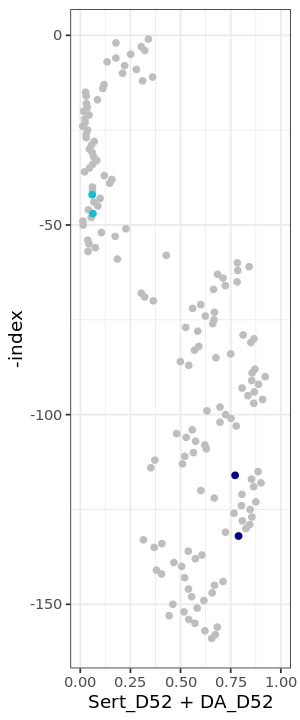

In [6]:
df$index = 1:nrow(df)
options(repr.plot.width=2.5, repr.plot.height=6)
ggplot(df,aes(x = Sert_D52+DA_D52, y = -index)) + geom_point(col = "grey",alpha = 1) + xlim(c(0,1)) +
    geom_point(data = df[df$donor_id == 'HPSI0514i-fiaj_1',], size = 1.5, col = '#17becf') + 
    geom_point(data = df[df$donor_id == 'HPSI1213i-hehd_1',], size = 1.5, col = 'darkblue') + 
    theme_bw()

In [7]:
options(repr.plot.width=2.5, repr.plot.height=6)
df$rep = FALSE
for (donor in unique(df$donor_id)){
    r = df[df$donor_id == donor,]
    if (nrow(r)>2){
        print(donor)
    }
    if (nrow(r)==2){
        df$rep[df$donor_id == donor] = TRUE
    }
}

In [8]:
head(df[order(df$donor_id),])

,donor_id,pool_id,P_FPP_D11,FPP_D11,NB_D11,P_FPP_D30,FPP_D30,Epen1_D30,U_Neur1_D30,DA_D30,Sert_D30,P_FPP_D52,FPP_D52,Astro_D52,Epen1_D52,U_Neur1_D52,DA_D52,Sert_D52,index,rep
49,HPSI0114i-eipl_1,pool1,0.3904395,0.5364132,0.073147257,0.04438441,0.29834041,0.253570050,0.333461984,0.01968352,0.005403319,0.079699248,0.15789474,0.511933680,0.138153075,0.0904569115,0.009562367,0.003315982,49,FALSE
96,HPSI0114i-wegi_1,pool6,0.4495780,0.5504220,0.000000000,0.09956553,0.13830558,0.006154960,0.005068791,0.10137581,0.649529327,0.002016129,0.04781106,0.001728111,0.007200461,0.0008640553,0.047235023,0.861463134,96,TRUE
115,HPSI0114i-wegi_1,pool7,0.3244444,0.6711111,0.004444444,0.03403566,0.05024311,0.001620746,0.000000000,0.52350081,0.390599676,0.000000000,0.01174168,0.017612524,0.000000000,0.0000000000,0.592954990,0.293542074,115,TRUE
144,HPSI0115i-aion_2,pool4,0.4387895,0.5584594,0.002751032,0.02589396,0.10604192,0.054254007,0.012330456,0.55240444,0.246609125,0.010353753,0.08541846,0.005176877,0.149266609,0.0155306299,0.313201035,0.398619500,144,FALSE
8,HPSI0115i-aoxv_1,pool8,0.4302359,0.5391786,0.030585494,0.04949197,0.37200918,0.298590626,0.072763029,0.08423468,0.122254998,0.022948366,0.10850586,0.025941631,0.534048391,0.0486405587,0.081317037,0.139935146,8,FALSE
45,HPSI0115i-bimq_4,pool4,0.3285486,0.5390750,0.132376396,0.07162534,0.36225895,0.148760331,0.192837466,0.18181818,0.037190083,0.108247423,0.17619494,0.361293346,0.156513590,0.1030927835,0.052014995,0.035613871,45,FALSE


In [9]:
# if (!requireNamespace("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# BiocManager::install("ComplexHeatmap")

In [10]:
library(ComplexHeatmap)
library(circlize)

Loading required package: grid
ComplexHeatmap version 2.2.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

circlize version 0.4.9
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))



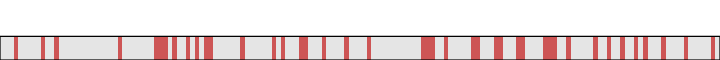

In [11]:
options(repr.plot.width=6, repr.plot.height=0.5)
ha = HeatmapAnnotation(df = data.frame(rep = df$rep),
    col = list(rep = c("TRUE" = "indianred3", "FALSE" = "grey90")), border = TRUE)
draw(ha)

In [12]:
options(repr.plot.width=2.5, repr.plot.height=6)
df$replicate = "no_rep"
for (donor in unique(df$donor_id)){
    r = df[df$donor_id == donor,]
    if (nrow(r)>2){
        print(donor)
    }
    if (nrow(r)==2){
        df$replicate[df$donor_id == donor][1] = 'rep1'
        df$replicate[df$donor_id == donor][2] = 'rep2'
    }
}

In [13]:
head(df)

donor_id,pool_id,P_FPP_D11,FPP_D11,NB_D11,P_FPP_D30,FPP_D30,Epen1_D30,U_Neur1_D30,DA_D30,...,P_FPP_D52,FPP_D52,Astro_D52,Epen1_D52,U_Neur1_D52,DA_D52,Sert_D52,index,rep,replicate
HPSI1014i-tixi_4,pool7,0.3666667,0.5833333,0.050000000,0.06777108,0.3147590,0.04969880,0.01506024,0.45331325,...,0.04005525,0.1422652,0.052486188,0.3936464,0.005524862,0.25276243,0.08701657,1,FALSE,no_rep
HPSI0714i-kute_5,pool5,0.5500000,0.4166667,0.033333333,0.03305785,0.1983471,0.07438017,0.11570248,0.47107438,...,0.01111111,0.2333333,0.088888889,0.3888889,0.100000000,0.06666667,0.11111111,2,FALSE,no_rep
HPSI1014i-vils_1,pool8,0.4947839,0.5027322,0.002483855,0.07525952,0.3399654,0.06747405,0.05622837,0.25259516,...,0.02191011,0.2078652,0.001685393,0.4140449,0.022471910,0.18539326,0.11853933,3,FALSE,no_rep
HPSI0914i-zerv_7,pool8,0.5062429,0.4835414,0.010215664,0.06512605,0.1932773,0.14495798,0.02521008,0.37394958,...,0.03492433,0.2339930,0.000000000,0.3701979,0.018626310,0.16181607,0.15948778,4,TRUE,rep1
HPSI1113i-hayt_3,pool9,0.4978434,0.4971623,0.004994325,0.06608293,0.3011730,0.05253593,0.04196266,0.41780935,...,0.03993673,0.1759589,0.013246342,0.4570977,0.013444049,0.11130882,0.13977857,5,FALSE,no_rep
HPSI0514i-qihv_1,pool6,0.4477612,0.5074627,0.044776119,0.11193242,0.4149947,0.19007392,0.04435058,0.05807814,...,0.03571429,0.2361751,0.102534562,0.3940092,0.020737327,0.01958525,0.15783410,6,FALSE,no_rep


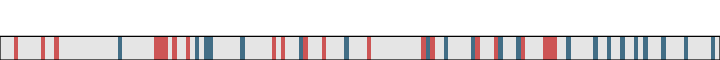

In [14]:
options(repr.plot.width=6, repr.plot.height=0.5)
ha = HeatmapAnnotation(df = data.frame(rep = df$replicate),
    col = list(rep = c("rep1" = "indianred3", "rep2" = "#426e86", "no_rep" = "grey90")), border = TRUE)
draw(ha)

In [15]:
df$diff_efficiency = df$DA_D52 + df$Sert_D52

In [16]:
nrow(df)

[1] 159

In [17]:
df_r = data.frame()

In [18]:
for (donor in unique(df$donor_id)){
    r = df[df$donor_id == donor,]
    if (nrow(r)>2){
        print(donor)
    }
    if (nrow(r)==2){
        df_r = rbind(df_r, data.frame(donor = donor, 
                          de1 = r[r$replicate == "rep1","diff_efficiency"],
                          de2 = r[r$replicate == "rep2","diff_efficiency"]))
    }
}

In [19]:
nrow(df_r)
head(df_r)

[1] 21

donor,de1,de2
HPSI0914i-zerv_7,0.32130384,0.66428571
HPSI0215i-hipn_1,0.21067416,0.52590420
HPSI0314i-sojd_3,0.11834962,0.02929190
HPSI0214i-feec_2,0.04519774,0.04014599
HPSI0514i-wiii_3,0.02131495,0.03737925
HPSI0514i-uenn_3,0.11952555,0.52076125


`geom_smooth()` using formula 'y ~ x'


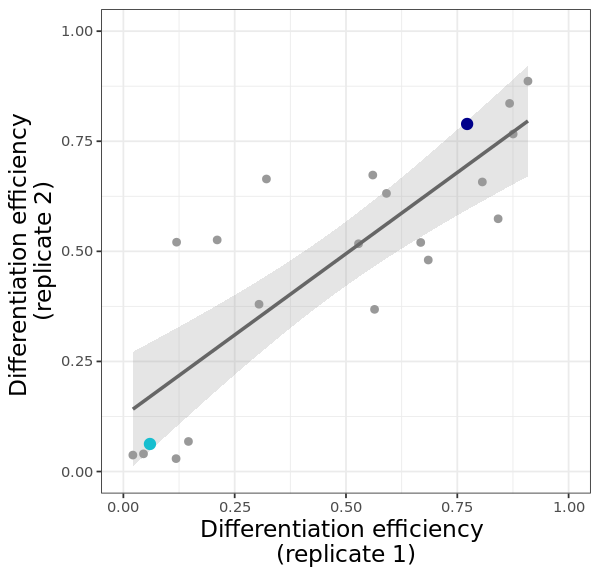

In [20]:
options(repr.plot.width=5, repr.plot.height=4.8)
ggplot(df_r, aes(x=de1,y=de2)) + geom_point(size = 1.8, col ='grey60') + stat_smooth(method = "lm", col = "grey40", alpha = "0.25") +
    xlab("Differentiation efficiency \n(replicate 1)") + ylab("Differentiation efficiency \n(replicate 2)") + 
    xlim(c(0,1)) + ylim(c(0,1))+
    geom_point(data = df_r[df_r$donor == "HPSI0514i-fiaj_1",], col = "#17becf", size = 2.8) +
    geom_point(data = df_r[df_r$donor == "HPSI1213i-hehd_1",], col = "darkblue", size = 2.8) + 
    theme_bw() + theme(axis.title = element_text(size = 14))

In [21]:
org = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/organoid_brain_fraction.csv")
org = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/organoid_neuron_fraction.csv")
nrow(org)
head(org,2)

[1] 12

donor_id,selected_fraction
HPSI0115i-aion_2,1
HPSI0115i-bimq_4,0


In [22]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [23]:
df0 = df %>% group_by(donor_id) %>% summarise(avg_de = mean(diff_efficiency))
df_org = left_join(org,df0,by = "donor_id")
head(df_org)

Warning message:
“Column `donor_id` joining factors with different levels, coercing to character vector”

donor_id,selected_fraction,avg_de
HPSI0115i-aion_2,1.0000000,0.71182053
HPSI0115i-bimq_4,0.0000000,0.08762887
HPSI0214i-feec_2,0.0000000,0.04267186
HPSI0214i-giju_3,0.2500000,0.80407701
HPSI0215i-deyz_2,0.6514286,0.61663905
HPSI0215i-fawm_2,0.3947368,0.80810640


In [24]:
nrow(df_org)

[1] 12

In [25]:
cor.test(df_org$avg_de, df_org$selected_fraction)


	Pearson's product-moment correlation

data:  df_org$avg_de and df_org$selected_fraction
t = 3.9792, df = 10, p-value = 0.002604
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3794888 0.9361679
sample estimates:
      cor 
0.7828862 


`geom_smooth()` using formula 'y ~ x'


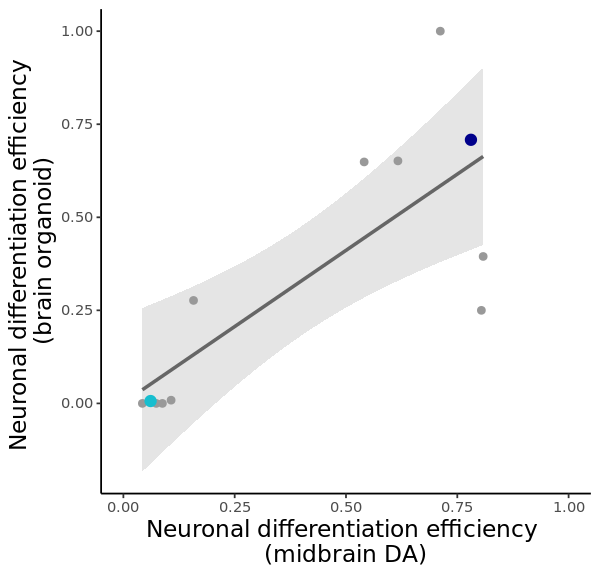

In [27]:
options(repr.plot.width=5, repr.plot.height=4.8)
ggplot(df_org, aes(x=avg_de,y=selected_fraction)) + geom_point(size = 1.8, col ='grey60') + 
    stat_smooth(method = "lm", col = "grey40", alpha = "0.25") +
    xlab("Neuronal differentiation efficiency \n(midbrain DA)") + ylab("Neuronal differentiation efficiency \n(brain organoid)") +  
    xlim(c(0,1)) + #ylim(c(0,1))+
    geom_point(data = df_org[df_org$donor == "HPSI0514i-fiaj_1",], col = "#17becf", size = 2.8) +
    geom_point(data = df_org[df_org$donor == "HPSI1213i-hehd_1",], col = "darkblue", size = 2.8) + 
    theme_classic() + theme(axis.title = element_text(size = 14))

`geom_smooth()` using formula 'y ~ x'


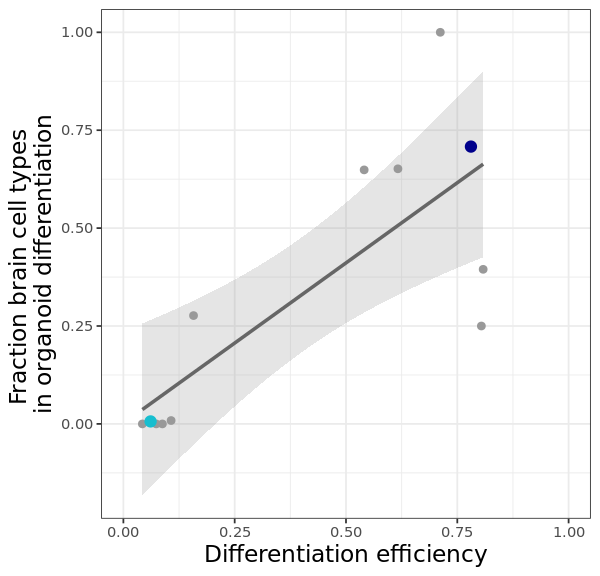

In [36]:
options(repr.plot.width=5, repr.plot.height=4.8)
ggplot(df_org, aes(x=avg_de,y=selected_fraction)) + geom_point(size = 1.8, col ='grey60') + 
    stat_smooth(method = "lm", col = "grey40", alpha = "0.25") +
    xlab("Differentiation efficiency") + ylab("Fraction brain cell types \nin organoid differentiation") + 
    xlim(c(0,1)) + #ylim(c(0,1))+
    geom_point(data = df_org[df_org$donor == "HPSI0514i-fiaj_1",], col = "#17becf", size = 2.8) +
    geom_point(data = df_org[df_org$donor == "HPSI1213i-hehd_1",], col = "darkblue", size = 2.8) + 
    theme_bw() + theme(axis.title = element_text(size = 14))